# Rental Bikes on Demand: Predictive Analytics for Hourly Bike Rental Demands
--- 
#### - Tony Smith
---
# Table of Contents
1. [Introduction](#Introduction)
    - [Dataset](#dataset)
    - [Dataset Source](#url-httpsarchiveicsuciedudataset560seoulbikesharingdemand)
    - [Dataset Details](#description)
    - [Importing Data](#importing-data)
    - [Dataset Features](#dataset-features)
    - [Dataset Functions](#dataset-functions)
2. [Goals & Objectives](#goals--objectives)
3. [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing)
    - [Data Cleaning Functions](#data-cleaning-functions)
    - [Checking for Missing Values](#checking-for-missing-values)
    - [Renaming Columns](#renaming-columns)
    - [Transforming Date](#transforming-date)
    - [Data Types](#data-types)
        - [Outliers](#outliers)
            - [Numerical Outliers](#numerical-outliers)
            - [Amount of Rented Bikes](#amount-of-rented-bikes)
            - [Floating Outliers Exploration & Cleaning](#floating-outliers-exploration--cleaning)
        - [Wind Speeds in South Korea](#wind-speeds-in-south-korea)
        - [Amount of Solar Radiation in South Korea](#amount-of-solar-radiation-in-south-korea)
        - [Amount of Rainfall in South Korea](#amount-of-rainfall-in-south-korea)
    - [Dealing with Outliers](#dealing-with-outliers)
        - [Rainfall](#rainfall)
        - [Snowfall](#snowfall)
        - [WindSpeed](#windspeed)
        - [Understanding the Relationship of Solar Radiation vs Hours](#understanding-the-relationship-of-solar-radiation-vs-hours)
            - [Amount of Bikes Rented per Hour](#amount-of-bikes-rented-per-hour)
            - [Amount of Bikes Rented per Hour for Each Day of the Week](#amount-of-bikes-rented-per-hour-for-each-day-of-the-week)
            - [Converting Solar Radiation into a Category](#converting-solar-radiation-into-a-category)
        - [Outliers in Categorical Features](#outliers-in-categorical-features)
        - [Functioning Days and Holidays](#functioning-days-and-holidays)
            - [Functioning Day Exploration](#functioning-day-exploration)
            - [Removing Functioning_Day](#removing-functioning_day)
4. [Univariate Exploration](#univariate-exploration)
5. [Two-Variable Visualisation](#two-variable-visualisation)
    - [Rented Bikes During Holidays](#rented-bikes-during-holidays)
6. [Three-variable plots](#three-variable-plots) 
7. [Summary and Conclusions](#summary-and-conclusions)
8. [References](#references)


---
# Dataset
#### - Name: Seoul Bike Sharing Demand
#### - Dataset Source: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
#### - Dataset Details: 
- Rental bikes are extremely popular in South Korea, offering easy access and a safe way to commute over medium distances. In Seoul, bike rental spots are everywhere, providing locals with convenient access to bicycles. Ensuring their availability and accessibility year-round is crucial for maintaining a reliable commuting option and enhancing the stability of urban transportation.
- The dataset includes weather-related features, temperature, humidity, wind speed, visibility, dew point, solar radiation, snowfall, and rainfall. It also provides information on the number of bikes rented per hour and corresponding date details.
- The dataset has 8,760 observations and 14 features.
- Missing values have been removed from the dataset.
#### - Importing Data

In [90]:
# Importing the libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
sns.set(style="ticks", context="notebook", palette="colorblind", font_scale=1)
# sns.set_style("ticks")
# File is not utf-8 format, so we need to use chardet to detect the encoding
import chardet 

csvname = 'Phase1_Group18.csv'

- #### Dataset Functions

In [91]:
def load_dataset(csvname):
    """ 
    Load a dataset from a CSV file using the appropriate encoding.

    The function first reads the CSV file in binary mode to detect its encoding using the chardet library.
    Then, it loads the CSV into a pandas DataFrame using the detected encoding.
    This ensures that the DataFrame correctly interprets the data in the file, especially when dealing with different languages or special characters.

    Parameters:
        csvname (str): The path to the CSV file to be loaded.

    Returns:
        pd.DataFrame: A pandas DataFrame containing the data from the CSV file.
    """
    with open(csvname, 'rb') as f:
        csv_encoding = chardet.detect(f.read())

    # Loading in the dataset
    df = pd.read_csv(csvname, encoding=csv_encoding['encoding'])
    # Setting precision for float values. 
    # Note: df = df.style.set_precision(3) from canvas guidelines did not work.
    pd.options.display.float_format = '{:.3f}'.format


    return df



def check_shape(df):
    """
    Check the shape of a DataFrame.

    This function prints the number of rows and columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The pandas DataFrame to be checked.

    Returns:
        None
    """
    print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")
    
    
def features_table(headers, features):
    """
    Display a table of features along with their descriptions and what needs to be done
    
    This function uses the tabulate library to display the features in a table format.
    
    Parameters:
        headers (list): A list of strings containing the column headers for the table.
        features (list): A list of lists containing the feature descriptions and what needs to be done.
        
    Returns:
        None
    """
    headers = headers
    features = features
    print(tabulate(features, headers=headers, tablefmt='fancy_grid'))
    
        


In [92]:
df = load_dataset(csvname)

# Displaying the amount of observations and features
check_shape(df)

The DataFrame has 8760 rows and 14 columns.


In [93]:
# Displaying 10 random rows
df.sample(10, random_state=22)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1378,27/01/2018,96,10,-12.300,35,0.600,1497,-24.600,0.600,0.000,0.300,Winter,No Holiday,Yes
6113,12/08/2018,1156,17,33.700,48,2.300,2000,21.100,0.410,0.000,0.000,Summer,No Holiday,Yes
3970,15/05/2018,832,10,22.700,37,0.900,879,7.200,2.180,0.000,0.000,Spring,No Holiday,Yes
4183,24/05/2018,1390,7,12.500,61,1.300,1818,5.100,0.420,0.000,0.000,Spring,No Holiday,Yes
1598,05/02/2018,170,14,-6.400,24,4.600,1970,-23.700,2.230,0.000,0.000,Winter,No Holiday,Yes
8165,06/11/2018,0,5,8.800,84,0.600,420,6.200,0.000,0.000,0.000,Autumn,No Holiday,No
4124,21/05/2018,2167,20,18.400,59,2.600,1476,10.200,0.040,0.000,0.000,Spring,No Holiday,Yes
718,30/12/2017,30,22,1.800,92,1.200,94,0.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4783,18/06/2018,1590,7,20.600,76,0.500,786,16.200,0.300,0.000,0.000,Summer,No Holiday,Yes
5772,29/07/2018,644,12,33.800,47,1.700,1962,20.900,1.920,0.000,0.000,Summer,No Holiday,Yes


#### - Dataset Features

In [94]:
headers = ['Name', 'Data Type', 'Unit', 'Description', 'TODO']
features = [
    ['Date', 'Ordinal', 'DD/MM/YYYY', 'Day/Month/Year', 'Needs to be split into day, month, year'],
    ['Rented Bike Count', 'Numeric', 'NA', 'Number of bikes rented on given date', 'No Spaces for column name'],
    ['Hour', 'Ordinal', 'NA', 'Hour of the Day', 'NA'],
    ['Temperature(°C)', 'Numeric', 'celsius', 'Temperature in celsius', 'Change Column Name'],
    ['Humidity(%)', 'Numeric', 'Percentage', 'Humidity level in percentage', 'Change Column Name'],
    ['Wind speed (m/s)', 'Numeric', 'Meters per Second', 'Wind speed in meters per second on given date', 'Change Column Name, No Spaces for column name'],
    ['Visibility (10m)', 'Numeric', 'Meters', 'How far ahead you can see in meters', 'Change Column Name'],
    ['Dew point temperature(°C)', 'Numeric', 'celsius', 'Dew point temperature in celsius', 'Change Column Name, No Spaces for column name'],
    ['Solar Radiation (MJ/m2)', 'Numeric', 'Megajoules per square meter', 'Amount of solar radiation in megajoules per square meter on given date', 'Change Column Name, No Spaces for column name'],
    ['Rainfall(mm)', 'Numeric', 'Millimeters', 'Amount of rainfall in millimeters on given date', 'Change Column Name'],
    ['Snowfall (cm)', 'Numeric', 'Centimeters', 'Amount of snowfall in centimeters on given date', 'Change Column Name, No Spaces for column name'],
    ['Seasons', 'Nominal Categorical', 'NA', 'Season of the year on given date', 'Removing "s" from the end, and needs to be converted to binary'],
    ['Holiday', 'Binary', 'NA', 'Whether it is a holiday or not on given date', 'Needs to be converted to binary'],
    ['Functioning Day', 'Binary', 'NA', 'Service is operational or functioning or not on given date', 'Needs to be converted to binary, No Spaces for column name'],
]
features_table(headers, features)

╒═══════════════════════════╤═════════════════════╤═════════════════════════════╤════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════╕
│ Name                      │ Data Type           │ Unit                        │ Description                                                            │ TODO                                                           │
╞═══════════════════════════╪═════════════════════╪═════════════════════════════╪════════════════════════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════════╡
│ Date                      │ Ordinal             │ DD/MM/YYYY                  │ Day/Month/Year                                                         │ Needs to be split into day, month, year                        │
├───────────────────────────┼─────────────────────┼─────────────────────────────┼───────────────────────────────────────

#### - Target Feature
- The target feature for this dataset is the Rented Bike Count (numerical) for each day. We want to predict how many bikes we will need on any given day to meet demand.


# Goals & Objectives
In Seoul, where over 36% of South Korea's population live, efficient transportation is important for an urban lifestyle. The city significantly relies on public transportation. Several years ago, Seoul launched a public rental bike program, offering a cheap and convenient option for people to get around the city. For about $1.20, anyone can rent a three-geared bike for up to three hours from a rental station. The rental process is streamlined through an app where you scan the QR code to unlock the bike. These rental stations are strategically placed at street corners and along roadways, with about 10 bikes each. With an extensive network of these stations, you're likely to find multiple rental spots within close proximity. Once your ride is complete, you can return the bike to any of the designated rental locations. Seoul's bike rental system is affordable and accessible, and has become a popular form of transit around the city.

The goal of my project is:
1. To predict the number of bikes needed at each hour in Seoul to ensure availability.
2. To identify the key features that influence bike rental demand.


My early observations suggest there are potential correlations among a few features, such as weather conditions and rental frequencies. I should note, the dataset lacks pollution data, which from my 12 years living in Seoul, I believe to impact outdoor activity levels significantly, especially in the spring. Periods after it rains and the aftermath of typhoons may also influence rental patterns. The extreme seasonal temperatures in Seoul are expected to correlate with bike rentals, while factors like humidity and solar radiation requires further analysis to determine their impact. Functioning day will likely have a strong correlation, as rentals are probably not possible during non-operational hours.

Further analysis on each of these features are needed to create an effective predictive model.


# Data Cleaning and Preprocessing


- #### Data Cleaning Functions

In [95]:
def rename_columns(df, new_column_names):
    """
    Rename the columns of a DataFrame.

    This function renames the columns of a DataFrame according to the mapping provided in the new_column_names dictionary.

    Parameters:
        df (pd.DataFrame): The pandas DataFrame whose columns are to be renamed.
        new_column_names (dict): A dictionary mapping the old column names to the new column names.

    Returns:
        pd.DataFrame: A new pandas DataFrame with the columns renamed.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    renamed_df = df.rename(columns=new_column_names).copy()
    return renamed_df


def date_feature(df, date_format):
    """
    Extract date features from a datetime column. Drops the original Date column and reorders the columns.

    This function extracts various date features from a datetime column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The pandas DataFrame containing the datetime column.

    Returns:
        pd.DataFrame: A new pandas DataFrame with additional date features.
    """
    # Convert the datetime column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    
    # Extract date features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Day_of_Week'] = df['Date'].dt.dayofweek
    df['Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)
    df.drop(['Date'], axis=1, inplace=True)

    return df


def reindex_df(df, reindex_list):
    """
    Reindex the columns of a DataFrame.

    This function reorders the columns of a DataFrame according to the list provided in reindex_list.

    Parameters:
        df (pd.DataFrame): The pandas DataFrame whose columns are to be reordered.
        reindex_list (list): A list of strings specifying the new order of the columns.

    Returns:
        pd.DataFrame: A new pandas DataFrame with the columns reordered.
    """
    # Reindex the columns
    reindexed_df = df.reindex(columns=reindex_list)
    return reindexed_df


def create_dtypes(df):
    """
    This function takes a pandas DataFrame as input and returns two lists: numerical_features and categorical_features.
    
    Parameters:
    df (pandas DataFrame): The input DataFrame.
    
    Returns:
    numerical_features (list): A list of column names that contain numerical data.
    categorical_features (list): A list of column names that contain categorical data.
    """
    # Select columns with numerical data types
    numerical_features = df.select_dtypes(include=['int32', 'int64']).columns
    
    float_features = df.select_dtypes(include=['float64']).columns
    # Select columns with categorical data types
    categorical_features = df.select_dtypes(include=['object']).columns
    
    # Print the numerical and categorical features
    print(f"The numerical features for the data frame are: {numerical_features.values}")
    print(f"The categorical features for data frame are: {categorical_features.values}")
    
    # Return the lists of numerical and categorical features
    return numerical_features, categorical_features, float_features


def change_astype(df, features_list, datatype):
    df[features_list] = df[features_list].astype(datatype)
    print(df.dtypes)
    return df

- #### Checking for Missing Values

In [96]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

- #### Renaming Columns
I have created a dictionary named 'new_column_names' to map the original column names of my DataFrame to new, more concise or standardized names. This dictionary contains key-value pairs, with the original column names as keys and the new names I prefer as values. For instance, I changed 'Rented Bike Count' to 'Rented_Bike_Count' and 'Temperature(°C)' to 'Temperature', among other updates. 

To rename the columns in the DataFrame based on the mappings I specified in the dictionary, I created a function called 'rename_columns'. I passed my DataFrame df along with the 'new_column_names' dictionary into this function. As a result, the function updated the DataFrame's column headers to these new names. 

This makes the DataFrame easier to handle, mainly because the new names are more consistent and straightforward in my analyses.

In [97]:
new_column_names = {'Rented Bike Count': 'Rented_Bike_Count', 'Temperature(°C)': 'Temperature',
                    'Humidity(%)': 'Humidity', 'Wind speed (m/s)': 'Wind_Speed', 'Visibility (10m)': 'Visibility', 
                    'Dew point temperature(°C)': 'Dew_Point_Temperature', 'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                    'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall', 'Seasons': 'Season', 'Functioning Day': 'Functioning_Day'}
df = rename_columns(df, new_column_names)

In [98]:
df.sample(10, random_state=22)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Season,Holiday,Functioning_Day
1378,27/01/2018,96,10,-12.300,35,0.600,1497,-24.600,0.600,0.000,0.300,Winter,No Holiday,Yes
6113,12/08/2018,1156,17,33.700,48,2.300,2000,21.100,0.410,0.000,0.000,Summer,No Holiday,Yes
3970,15/05/2018,832,10,22.700,37,0.900,879,7.200,2.180,0.000,0.000,Spring,No Holiday,Yes
4183,24/05/2018,1390,7,12.500,61,1.300,1818,5.100,0.420,0.000,0.000,Spring,No Holiday,Yes
1598,05/02/2018,170,14,-6.400,24,4.600,1970,-23.700,2.230,0.000,0.000,Winter,No Holiday,Yes
8165,06/11/2018,0,5,8.800,84,0.600,420,6.200,0.000,0.000,0.000,Autumn,No Holiday,No
4124,21/05/2018,2167,20,18.400,59,2.600,1476,10.200,0.040,0.000,0.000,Spring,No Holiday,Yes
718,30/12/2017,30,22,1.800,92,1.200,94,0.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4783,18/06/2018,1590,7,20.600,76,0.500,786,16.200,0.300,0.000,0.000,Summer,No Holiday,Yes
5772,29/07/2018,644,12,33.800,47,1.700,1962,20.900,1.920,0.000,0.000,Summer,No Holiday,Yes


- ### Transforming Date
    I defined a specific date format string, 'date_format', as '%d/%m/%Y', which represents the day, month, and year of a date. Next, I passed my DataFrame, 'df', and the date format string to a function named 'date_feature'. This function is designed to process the date-related columns in the DataFrame, extract relevant information, and create new columns based on the specified date format, such as day of the week, month, year, etc.

    After processing the date features, I created a list called 'reindex_list', which is strategically arranged to specify the order in which the columns should appear in the DataFrame. The list starts with date-related features, such as 'Day', 'Month', 'Year', 'Day_of_Week', and 'Weekend', followed by other significant features such as 'Rented_Bike_Count', 'Hour', and weather-related variables such as 'Temperature', 'Humidity', and 'Wind_Speed'.

    Finally, I used another function named 'reindex_df', where I passed the DataFrame 'df' and the 'reindex_list'. This function reorganizes the columns of the DataFrame according to the order specified in 'reindex_list'. The goal is to make the DataFrame more structured and easier to navigate, especially for subsequent data analysis and modeling tasks.

In [99]:
date_format = '%d/%m/%Y'
date_feature(df,date_format)
reindex_list = ['Day', 'Month', 'Year', 'Day_of_Week', 'Weekend',
                'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
                'Wind_Speed', 'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation',
                'Rainfall', 'Snowfall', 'Season', 'Holiday', 'Functioning_Day']
df = reindex_df(df, reindex_list)
df.head()

,Day,Month,Year,Day_of_Week,Weekend,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Season,Holiday,Functioning_Day
0,1,12,2017,4,0,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
1,1,12,2017,4,0,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
2,1,12,2017,4,0,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes
3,1,12,2017,4,0,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4,1,12,2017,4,0,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes


- ### Data Types
    I am examining the data types of each feature to check if any of them are mislabeled.

In [100]:
df.dtypes

Day                        int32
Month                      int32
Year                       int32
Day_of_Week                int32
Weekend                    int64
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_Point_Temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Season                    object
Holiday                   object
Functioning_Day           object
dtype: object

After assessing the data types, I created a function called create_dtypes and passed df to it. This function categorizes the features of the DataFrame into three distinct lists: numerical_features, categorical_features, and float_features, based on their data types and the characteristics of the data they contain.

Next, I took the list of categorical_features and created another function called change_astype. I passed df, the list of categorical_features, and the target data type 'category' as arguments to this function. The purpose of change_astype is to convert the data types of the categorical features in the DataFrame to a more appropriate type based on my analysis. In this case, I converted features that I identified as categorical into the 'category' data type. 

By converting categorical data types, I was able to reduce memory usage and improve performance for subsequent operations like data analysis or machine learning. Categorical data types are more efficient and suitable for features with a limited number of unique categories.

In [101]:
numerical_features, categorical_features, float_features = create_dtypes(df)
df = change_astype(df, categorical_features, 'category')

The numerical features for the data frame are: ['Day' 'Month' 'Year' 'Day_of_Week' 'Weekend' 'Rented_Bike_Count' 'Hour'
 'Humidity' 'Visibility']
The categorical features for data frame are: ['Season' 'Holiday' 'Functioning_Day']
Day                         int32
Month                       int32
Year                        int32
Day_of_Week                 int32
Weekend                     int64
Rented_Bike_Count           int64
Hour                        int64
Temperature               float64
Humidity                    int64
Wind_Speed                float64
Visibility                  int64
Dew_Point_Temperature     float64
Solar_Radiation           float64
Rainfall                  float64
Snowfall                  float64
Season                   category
Holiday                  category
Functioning_Day          category
dtype: object


- # Outliers
    Firstly, I use the df.describe() method on my DataFrame to obtain a statistical summary of all numerical columns. This summary provides crucial metrics like the mean, median, standard deviation, quartiles, minimum and maximum values, and helps me understand the distribution of the data and identify any anomalies or outliers. If I notice any unusually high or low values in the 'max' or 'min' fields, I can investigate them further.

In [102]:
df.describe()

,Day,Month,Year,Day_of_Week,Weekend,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000,8760.000
mean,15.721,6.526,2017.915,3.003,0.285,704.602,11.500,12.883,58.226,1.725,1436.826,4.074,0.569,0.149,0.075
std,8.797,3.448,0.279,1.998,0.451,644.997,6.923,11.945,20.362,1.036,608.299,13.060,0.869,1.128,0.437
min,1.000,1.000,2017.000,0.000,0.000,0.000,0.000,-17.800,0.000,0.000,27.000,-30.600,0.000,0.000,0.000
25%,8.000,4.000,2018.000,1.000,0.000,191.000,5.750,3.500,42.000,0.900,940.000,-4.700,0.000,0.000,0.000
50%,16.000,7.000,2018.000,3.000,0.000,504.500,11.500,13.700,57.000,1.500,1698.000,5.100,0.010,0.000,0.000
75%,23.000,10.000,2018.000,5.000,1.000,1065.250,17.250,22.500,74.000,2.300,2000.000,14.800,0.930,0.000,0.000
max,31.000,12.000,2018.000,6.000,1.000,3556.000,23.000,39.400,98.000,7.400,2000.000,27.200,3.520,35.000,8.800


- ### Numerical Outliers
    To analyze the potential outliers, particularly for the Rented_Bike_Count feature, I create a box plot. To create a clear and visible distribution, I set the size of the plot to be 15 by 2 inches using **plt.figure(figsize=(15,2))**. I then generate the box plot for the Rented_Bike_Count column using **sns.boxplot**. The box plot visually displays the median, interquartile range, and any points that fall outside of the whiskers. These points are considered outliers, as they lie beyond 1.5 times the interquartile range from the quartiles. To make the plot clear and informative, I label the x-axis with 'Bikes' and title the plot 'Amount of Rented Bikes'. After plotting, I use plt.show() to display my plot and then use plt.close() to clear the plot after viewing, ensuring that my workspace is ready for further analysis.

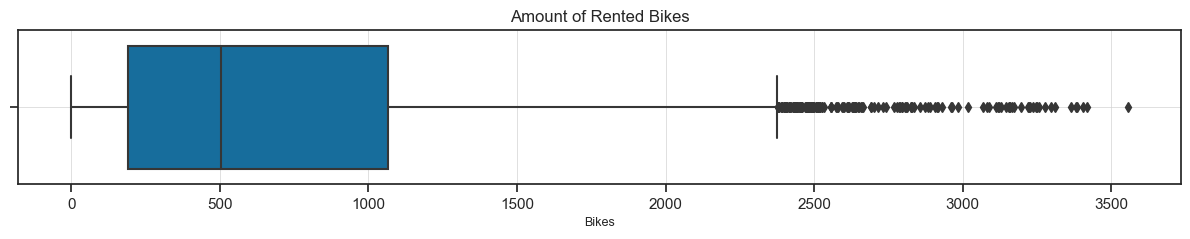

In [103]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['Rented_Bike_Count'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.xlabel('Bikes', fontsize=9)
plt.title('Amount of Rented Bikes')
plt.show()
plt.close()

- ### Amount of Rented Bikes
    Upon examining the box plot for the 'Amount of Rented Bikes', I noticed that there are quite a lot of potential outliers, or data points that fall outside the typical range. These outliers are represented by dots beyond the whiskers of the box plot. I believe that these outliers might correspond to special days, such as holidays or weekends, where bike rental patterns deviate from the norm due to more recreational activities or tourism in the area.

    The decision to keep or remove these outliers depends on the analysis goals. If the aim is to develop a predictive model that performs well under typical conditions, it might be best to remove these outliers to avoid skewing the model's understanding of a 'normal' day. However, if the goal is to make accurate predictions during holidays and weekends, it's better to keep these outliers in the dataset. They provide valuable information about rental patterns during atypical periods, and exclusion could lead to underperformance in the future under similar conditions.

    Since the 'Amount of Rented Bikes' is the target variable for predictive features, the approach to outliers will significantly influence the model's performance and generalization across different days. If the target is to predict bike rentals accurately for all days, including holidays and weekends, then keeping these outliers as part of the training data is critical. Removing them could lead to underestimation of bike rentals during special days, which would compromise the model's usefulness in real-world scenarios.

    For this project, I will keep the outliers as they are.

 - ### Floating Outliers Exploration & Cleaning

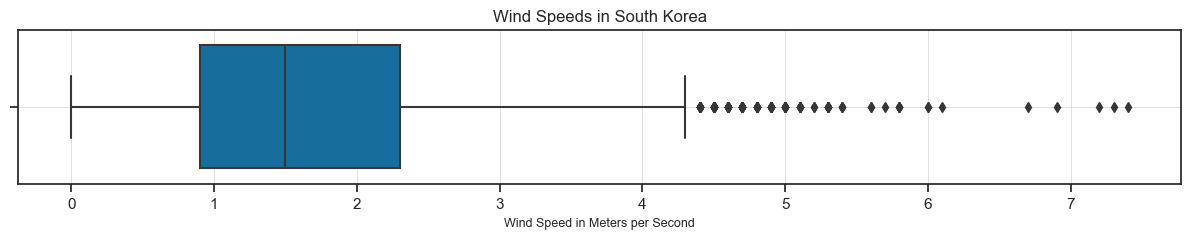

In [104]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['Wind_Speed'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Wind Speeds in South Korea')
plt.xlabel('Wind Speed in Meters per Second', fontsize=9)
plt.show()
plt.close()

- ### Wind Speeds in South Korea
    The box plot I created shows the wind speeds in South Korea. The dots beyond the whiskers suggest days with exceptionally high wind speeds that could be considered outliers. Rather than removing these from my dataset, I've retained them. This decision is based on my understanding that wind speed variations can significantly impact people's decision to rent bikes. 

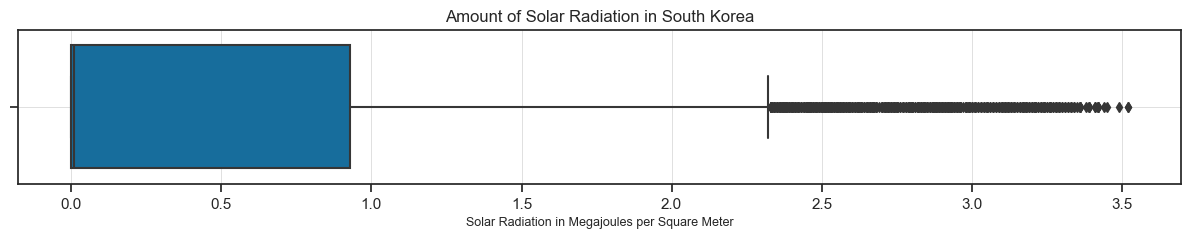

In [105]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['Solar_Radiation'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Amount of Solar Radiation in South Korea')
plt.xlabel('Solar Radiation in Megajoules per Square Meter', fontsize=9)
plt.show()
plt.close()

- ### Amount of Solar Radiation in South Korea
    I have been looking this box plot that shows the levels of solar radiation in South Korea, measured in megajoules per square meter. Initially, I needed clarification about solar radiation and how it could potentially affect bicycle commuting patterns. Solar radiation refers to the energy emitted by the sun, including visible light, ultraviolet light, and infrared radiation. However, I could not find any information on what would be considered a good amount of solar radiation. Further below, I did some further exploration.

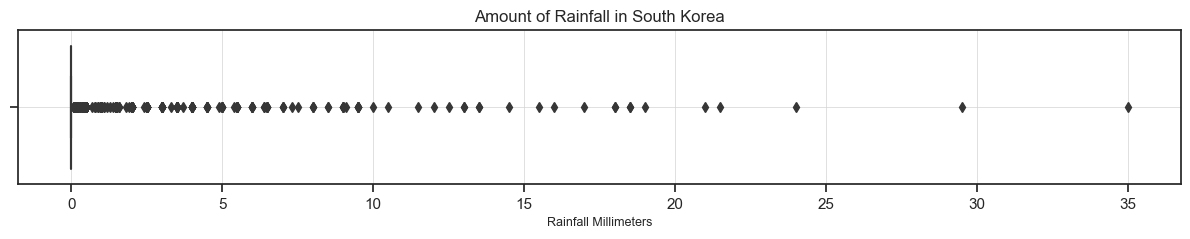

In [106]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['Rainfall'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Amount of Rainfall in South Korea')
plt.xlabel('Rainfall Millimeters', fontsize=9)
plt.show()
plt.close()

- ### Amount of Rainfall in South Korea
    The boxplot shows a wide range of rainfall measurements in South Korea, an important factor correlating with bike commuting habits. Higher levels of rainfall generally lead to a decrease in bike rentals as wet conditions are less conducive to outdoor activities like cycling. However, light rain may encourage only some cyclists, especially if they have the necessary rain gear or if suitable infrastructure and cultural habits support cycling in all weather conditions.

    It's important to note that the variation in the plot, referred to as "noise," might not only be random but could also represent actual fluctuations in weather conditions. These fluctuations are essential to capture and understand because they reflect real-world scenarios bike rental services need to plan for. Therefore, while there may be a lot of noise in the rainfall data, this variability is an intrinsic part of how weather patterns affect bike commuting and is essential information for my analysis rather than something to be disregarded.

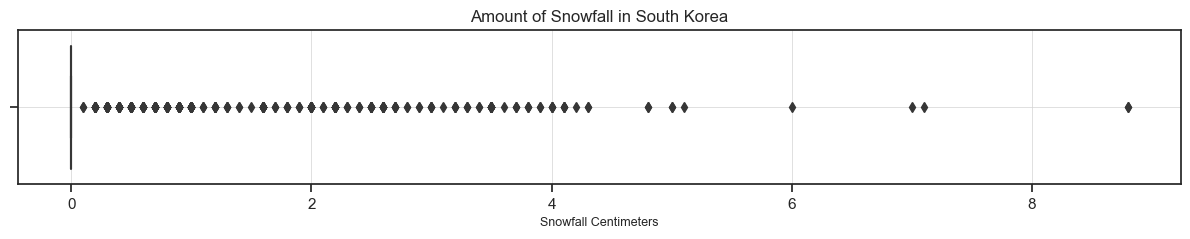

In [107]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df['Snowfall'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Amount of Snowfall in South Korea')
plt.xlabel('Snowfall Centimeters', fontsize=9)
plt.show()
plt.close()

The boxplot is similar to the rainfall boxplot. The noise may not only be random, but these fluctuations are also crucial to capture and understand because they reflect real-world scenarios that bike rental services need to plan for.

- # Dealing with Outliers
- ### Rainfall
    I undertook the task of categorising rainfall data with meticulous care. Drawing from a reference on a paper about estimating rainfall levels (Avanzato & Beritelli, 2020), I defined the edges for different rain intensities, spanning from ‘No rain’ to ‘Cloudburst.’ I then applied these categories to the ‘Rainfall’ data in my DataFrame using the pd. cut function. This method allowed me to segment the continuous rainfall data into discrete categories based on the defined intensity thresholds, which I’ve labelled accordingly. This careful approach ensures the reliability and accuracy of our categorisation, laying a strong foundation for our analysis.

    My rationale behind this approach was backed by another study on the effects of weather on commuting by bike (Heinen, Maat, & van Wee, 2010), along with the impact of crosswinds on cyclists (Fintelman et al., 2014). These studies underline the relevance of weather conditions in influencing commuting behaviour. By categorising the rainfall feature, I maintain its predictive power within my dataset, acknowledging that different rainfall intensities might impact bike rental patterns differently. Instead of treating these outliers as noise, I recognise them as meaningful variations that could provide insights into rental trends under different weather conditions. This methodology ensures that my data analysis or predictive modelling can account for these nuances, potentially leading to more accurate and real-world applicable results.   

In [108]:
# -1 to 0 for No rain
rain_edges = [-1, 0.5, 2, 6, 10, 18, 30, df['Rainfall'].max()]
rain_labels = ['No rain', 'Weak rain', 'Moderate rain', 'Heavy rain', 'Very heavy rain', 'Shower', 'Cloudburst']
df['Rainfall'] = pd.cut(df['Rainfall'], bins=rain_edges, labels=rain_labels)

In [109]:
# Quick look at the distribution of the rainfall
df.Rainfall.value_counts()

Rainfall
No rain            8439
Weak rain           170
Moderate rain       100
Heavy rain           29
Very heavy rain      14
Shower                7
Cloudburst            1
Name: count, dtype: int64

- ### Snowfall
    In my dataset, I utilised an image from a paper by Son et al. (2013) to establish categories for different snowfall levels. I defined these categories as 'No Snow', 'Light Snow', 'Medium Snow', and 'Heavy Snow'. I set up a series of edges for the pd.cut function in pandas to implement these categories, defining each category’s boundaries. The snow_edges list starts with -1 to include zero snowfall in the 'No Snow' category and goes up to the maximum value found in the 'Snowfall' column of my DataFrame, ensuring all data points are categorised.

    I used the pd.cut function for the ‘Snowfall’ column in my DataFrame df to segment the continuous snowfall data into these predefined categories based on the edges I set. The bins are defined so that any snowfall between -1 and 0.1 millimetres is labelled as 'No Snow', snowfall between 0.1 and 2 millimetres is labelled as ‘Light Snow’, exactly 2 millimetres is labelled as ‘Medium Snow’, and anything above 2.1 millimetres up to the maximum recorded snowfall is labelled as 'Heavy Snow'.

    The categorisation of snowfall, similar to how I categorised rainfall, plays a pivotal role in my analysis. It allows for a more nuanced understanding of how snow affects bike rentals, a key aspect of my research. Snowfall can significantly impact people’s willingness to commute by bike, and the different categories provide a clearer picture of these impacts. For instance, ‘Light Snow’ might discourage some riders, but ‘Heavy Snow’ could bring bike rentals to a complete halt. Accurately categorising snowfall levels is, therefore, essential in assessing and predicting the influence of weather on bike rental patterns.

In [110]:
snow_edges = [-1, 0.1, 2, 2.1, df['Snowfall'].max()]
snow_labels = ['No Snow', 'Light Snow', 'Medium Snow', 'Heavy Snow']
df['Snowfall'] = pd.cut(df['Snowfall'], bins=snow_edges, labels=snow_labels)


In [111]:
# Quick look at the distribution of the snowfall
df.Snowfall.value_counts()

Snowfall
No Snow        8319
Light Snow      323
Heavy Snow      115
Medium Snow       3
Name: count, dtype: int64

- ### WindSpeed
    I had wind speed measurements in my dataset that I wanted to categorise based on different levels of wind intensity (Roeger et al., 2003). First, I checked the maximum wind speed value using the command df.Wind_Speed.max(). This helped me understand the range of my data. I found a classification that defines wind speeds as 'Calm', 'Light', 'Moderate', 'Strong', and 'Extreme'. Based on this classification, I decided to categorise my data accordingly.

    Although I was initially only interested in distinguishing between 'Calm' and 'Light' wind conditions for South Korea, I set up my bin edges to include -1 (to ensure that a speed of 0 is included) and 1, going up to the maximum wind speed found in my dataset. Then, I used these edges to create two labels: 'Calm' for wind speeds between -1 and 1 km/h and 'Light' for wind speeds greater than 1 km/h up to the maximum recorded.

    Using the pd.cut function to categorise the ‘Wind_Speed’ column in my DataFrame, df, I could assign each wind speed measurement to either ‘Calm’ or ‘Light’, depending on which bin it fell into. This practical categorisation was a crucial step in my analysis, enabling me to group the data into meaningful categories and easily correlate it with other variables. This approach simplified the data and made it more applicable to real-world scenarios.

    For instance, this categorization allowed me to correlate the frequency of bike rentals with different wind conditions on other days. This opens up a world of possibilities for understanding the impact of wind speed on various activities, sparking new avenues for research and analysis.

In [112]:
df.Wind_Speed.max()

7.4

In [113]:
wind_edges = [-1, 1, df['Wind_Speed'].max()]
wind_labels = ['Calm', 'Light']
df['Wind_Speed'] = pd.cut(df['Wind_Speed'], bins=wind_edges, labels=wind_labels)


In [114]:
df.Wind_Speed.value_counts()

Wind_Speed
Light    6154
Calm     2606
Name: count, dtype: int64

- #### Understanding the Relationship of Solar Radiation vs Hours

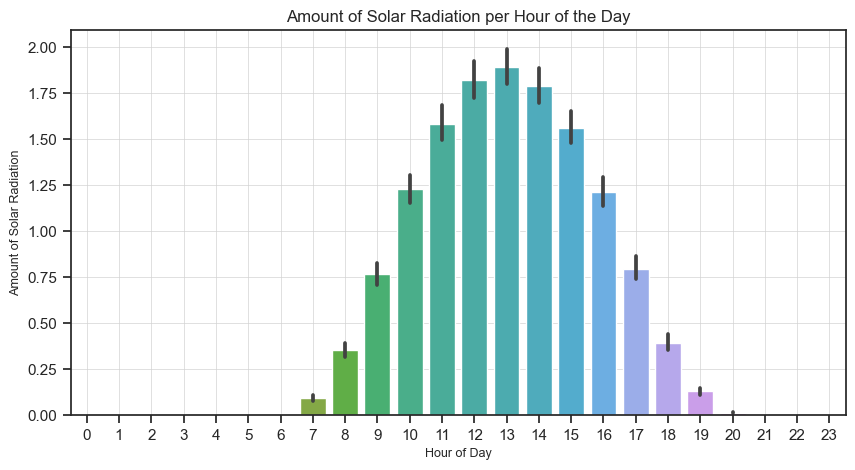

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Solar_Radiation', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Amount of Solar Radiation per Hour of the Day')
plt.xlabel('Hour of Day', fontsize=9)
plt.ylabel('Amount of Solar Radiation', fontsize=9)
plt.show()
plt.close()

- ### Amount of Solar Radiation per Hour of the Day
    At the outset, I was confused by the effects of solar radiation measurements to shed light on our daily activities, particularly our commuting habits. To delve deeper, I plotted solar radiation data across various hours of the day. The resulting bar graph revealed a clear pattern: a surge in radiation during daylight hours, followed by a decline at night. This not only confirmed that solar radiation is a continuous variable, but also underscored its potential significance in our daily lives. I am currently refraining from categorizing it into day and night times, opting for simplicity, as the amount of sunlight received during specific hours can vary significantly due to seasonal changes.

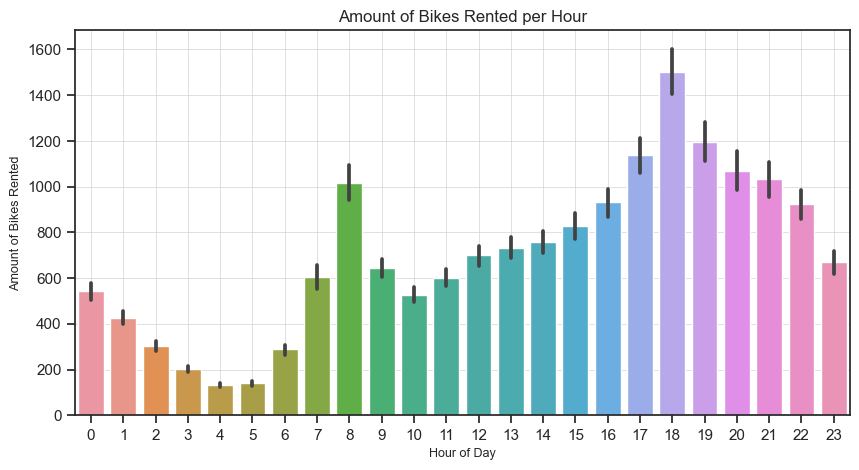

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Rented_Bike_Count', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Amount of Bikes Rented per Hour')
plt.xlabel('Hour of Day', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.show()
plt.close()

- ### Amount of Bikes Rented per Hour
    Continuing my analysis, I juxtaposed the solar radiation data with the number of bikes rented per hour. The results were intriguing. While I expected to find a correlation between leisure time and bike rentals, I was surprised to discover a strong link between typical work hours and bike rentals. This unexpected finding prompted me to delve deeper into the data, considering the possibility that people might be using bikes for their daily commute, particularly after work or school hours. I also hypothesized that this pattern might differ on weekends, when people have more leisure time.

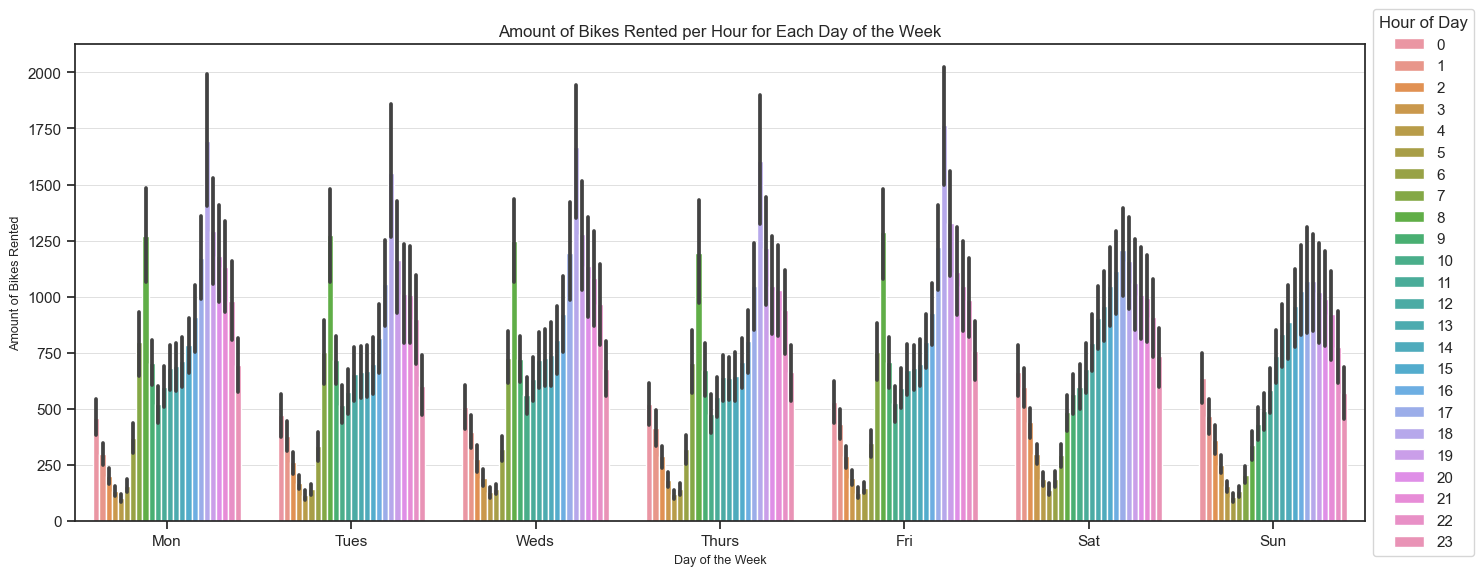

In [117]:
plt.figure(figsize=(15,6))
Weeklabels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(range(0,7), Weeklabels)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
sns.barplot(x='Day_of_Week', y='Rented_Bike_Count', hue='Hour',data=df)
plt.title('Amount of Bikes Rented per Hour for Each Day of the Week')
plt.xlabel('Day of the Week', fontsize=9)
plt.xticks(range(0,7), Weeklabels)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.legend(title='Hour of Day', bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()
plt.close()

- ### Amount of Bikes Rented per Hour for Each Day of the Week
    To investigate this idea further, I produced another plot showing bike rentals over multiple hours for multiple days. While I didn't conduct any statistical tests, the visual trend confirmed my hypothesis. Commuting to work or school played a significant role in weekday bike rentals. Though people have more free time on weekends, bike rentals didn't increase as much as I expected. Nevertheless, the overall pattern remained consistent across all days. This preliminary observation suggests that while free time after work or school does impact higher bike rental rates, other factors, such as leisure activities and different weekend routines, may also affect rental patterns. Because solar radiation has a pattern, I decided in the end to categorise it by day and night. 

- ### Converting Solar Radiation into a Category
    I looked at the 'Solar_Radiation' column in my DataFrame df and wanted to simplify this feature into something more binary for my analysis. To do this, I creating a new column using the apply method with a lambda function. The lambda function categorises each row based on whether the 'Solar_Radiation' value is greater than zero or not. If it is greater than zero, it assigns 'Day' to the row; otherwise, it assigns 'Night'. This reflects the basic understanding that solar radiation is present during the day and absent at night.

    After creating the new 'Day_Night' column, I removed the original 'Solar_Radiation' column from my DataFrame as it was now redundant. I used the drop method with the axis=1 parameter and inplace=True to make this change permanent in my DataFrame.

    Once the 'Day_Night' column was ready, I was curious about the dataset’s distribution of day and night occurrences. I used the value_counts method on the 'Day_Night' column to get a quick count. This gave me an easy way to see how many rows were categorised as 'Day' and how many as 'Night'. This information could help me understand patterns in bike rentals related to these two periods of the day.

In [118]:
df['Day_Night'] = df['Solar_Radiation'].apply(lambda x: 'Day' if x > 0 else 'Night')
df.drop(['Solar_Radiation'], axis=1, inplace=True)

In [119]:
df.Day_Night.value_counts()

Day_Night
Day      4460
Night    4300
Name: count, dtype: int64

- ### Outliers in Categorical Features

    To visualize the rental trends, I created two separate histograms. For the first histogram, I wanted to see the distribution of bike rentals on functioning days when the bike rental system is operational.

    To create the first histogram, I set the plot size to 10 by 5 inches using the 'plt.figure' function, ensuring a clear distribution view. I then used 'sns.histplot' to generate a histogram of the 'Functioning_Day' column from my DataFrame. I labelled the plot 'Rented Bikes on Functioning Days' and marked the x-axis as 'Functioning Day' and the y-axis as 'Amount of Bikes Rented'. After displaying the plot using 'plt.show()', I closed it with 'plt.close()' to maintain a clean slate for the next plot.

    For the second histogram, I set the plot size to 10 by 5 inches and used 'sns.histplot' again, but this time for the 'Holiday' column. I titled the plot 'Rented Bikes on Holidays' and labelled the y-axis with 'Amount of Bikes Rented'. After viewing this histogram, I closed the plot to maintain tidiness in my working environment.

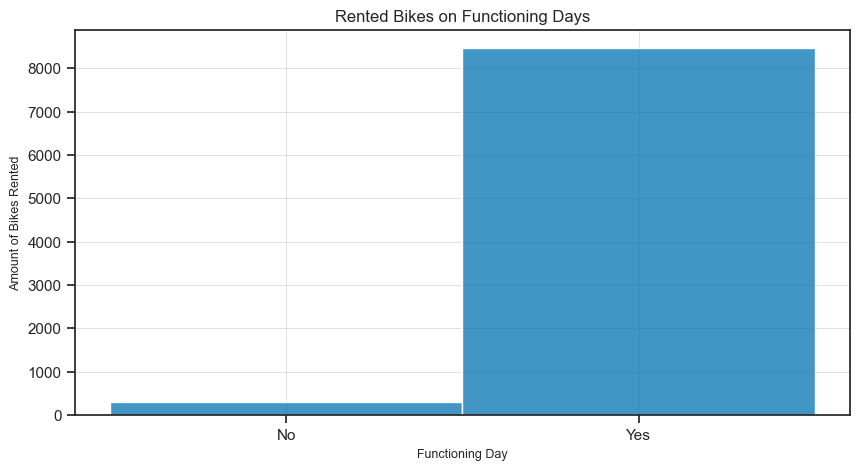

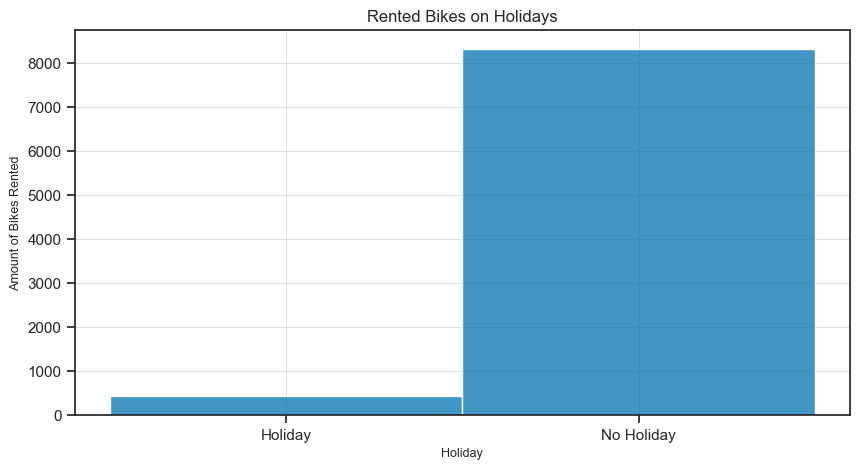

In [120]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Functioning_Day'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Rented Bikes on Functioning Days')
plt.xlabel('Functioning Day', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.show()
plt.close()

plt.figure(figsize=(10,5))
sns.histplot(x=df['Holiday'])
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Rented Bikes on Holidays')
plt.xlabel('Holiday', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.show()
plt.close()

- ### Functioning Days and Holidays
    Both histograms revealed key insights indicating a significant difference in the number of bikes rented on functioning days versus holidays. Such insights could play a crucial role in guiding decisions for bike rental services, including staffing and stock management.

    Both also showed low rental rates for 'No' and 'Holiday'. Having used this service before while living in South Korea, I wondered if the rates were low or zero.


- ### Functioning Day Exploration
    It turns out that zero bikes are rented during functioning days. This means we do not need this feature for our machine learning model in phase 2 as it will only add bias to our data.

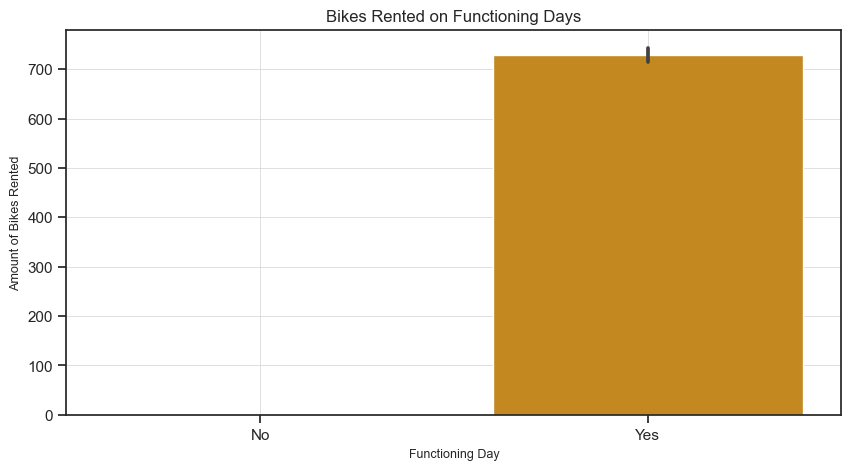

In [121]:
plt.figure(figsize=(10,5))
sns.barplot(x='Functioning_Day', y='Rented_Bike_Count', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Bikes Rented on Functioning Days')
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.xlabel('Functioning Day', fontsize=9)
plt.show()
plt.close()

- ### Removing Functioning_Day
    It turns out that no bikes were rented on days when the rental system was down. This was important because it showed that the feature ‘Functioning_Day’ was constant. It didn’t change and always corresponded to a day when bikes were rented. Therefore, this feature would not be useful for the next phase of my machine-learning model. It wouldn’t add any variance to the data and would only introduce bias, which could mislead the model. As a result, I decided to remove this feature from my dataset before proceeding to the modeling phase.

In [122]:
df.drop(['Functioning_Day'], axis=1, inplace=True)

# Univariate Exploration

In [123]:
df.columns

Index(['Day', 'Month', 'Year', 'Day_of_Week', 'Weekend', 'Rented_Bike_Count',
       'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Rainfall', 'Snowfall', 'Season', 'Holiday',
       'Day_Night'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

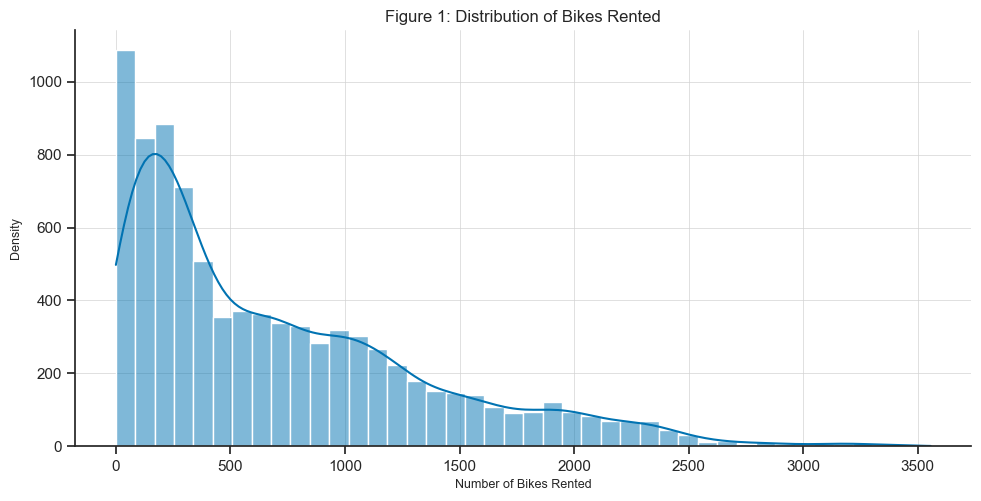

In [124]:
plt.figure(figsize=(10,5))
sns.displot(df['Rented_Bike_Count'], kde=True, height=5, aspect=2)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Figure 1: Distribution of Bikes Rented')
plt.xlabel('Number of Bikes Rented', fontsize=9)
plt.ylabel('Density', fontsize=9)
plt.show()
plt.close()

<Figure size 1000x500 with 0 Axes>

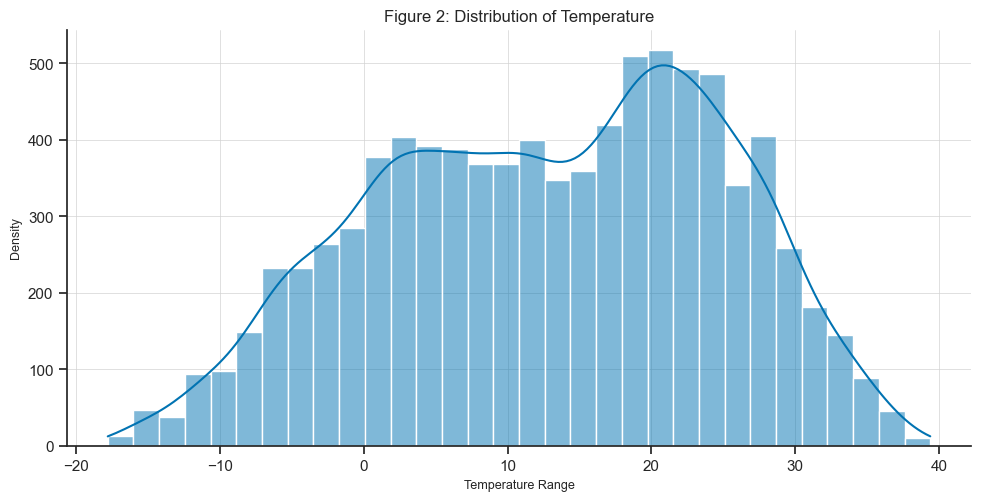

In [125]:
plt.figure(figsize=(10,5))
sns.displot(df['Temperature'], kde=True, height=5, aspect=2)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Figure 2: Distribution of Temperature')
plt.xlabel('Temperature Range', fontsize=9)
plt.ylabel('Density', fontsize=9)
plt.show()
plt.close()

# Two-Variable Visualisation


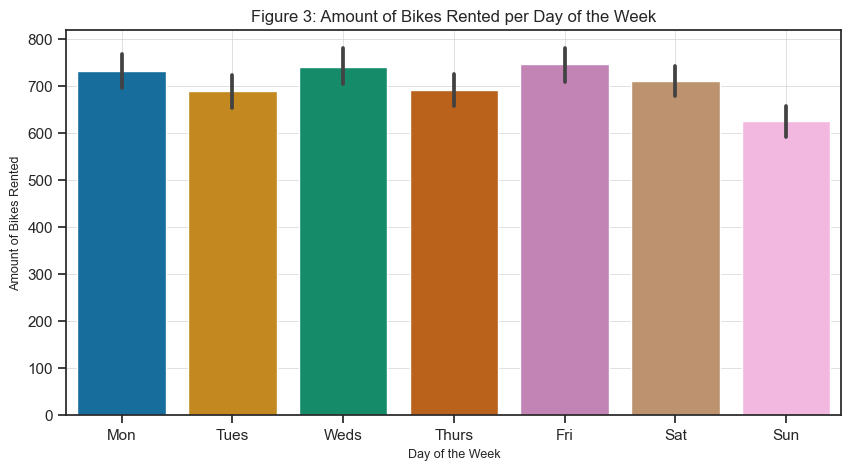

In [126]:
plt.figure(figsize=(10,5))
Weeklabels = "Mon Tues Weds Thurs Fri Sat Sun".split()
sns.barplot(x='Day_of_Week', y='Rented_Bike_Count', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.xticks(range(0,7), Weeklabels)
plt.xlabel('Day of the Week', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.title('Figure 3: Amount of Bikes Rented per Day of the Week')
plt.show()
plt.close()

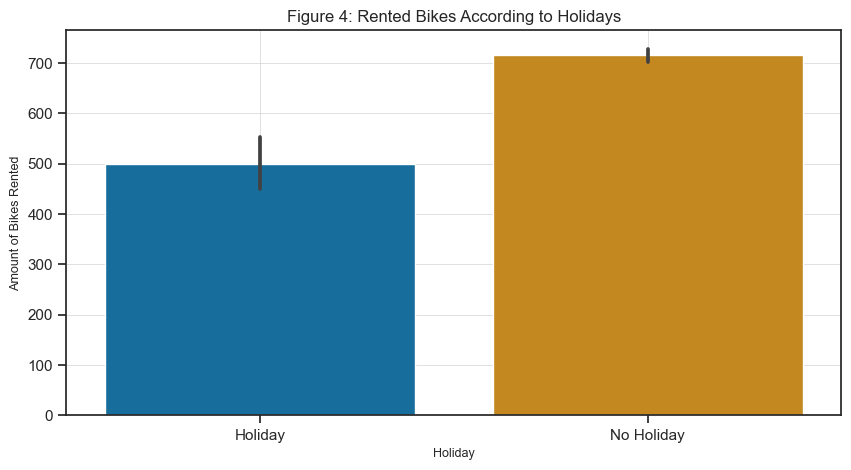

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday', y='Rented_Bike_Count', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.title('Figure 4: Rented Bikes According to Holidays')
plt.xlabel('Holiday', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.xlabel('Holiday')
plt.show()
plt.close()

- ### Rented Bikes During Holidays
    I noticed that even on holidays, people still rent bikes and decided to include the ‘Holiday’ feature in my dataset. I believe that there is demand for bike rentals during holidays. Rentals on these days might follow a distinct pattern from regular days, which could play a critical role in accurately predicting bike rental demand. By including the ‘Holiday’ feature, I am confident that the model’s ability to forecast the number of bikes needed during holiday periods will be enhanced. This consideration is important to ensure that bike rental services are well-prepared to meet the unique demands that holidays might present.

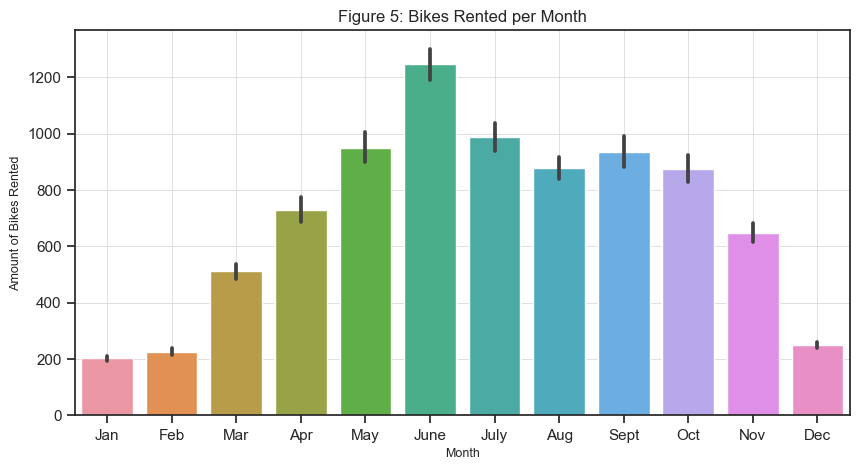

In [128]:
Monthlabels = "Jan Feb Mar Apr May June July Aug Sept Oct Nov Dec".split()
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Rented_Bike_Count', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.xticks(range(0,12), Monthlabels)
plt.xlabel('Month', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.title('Figure 5: Bikes Rented per Month')
plt.show()
plt.close()

# Three-Variable plots 

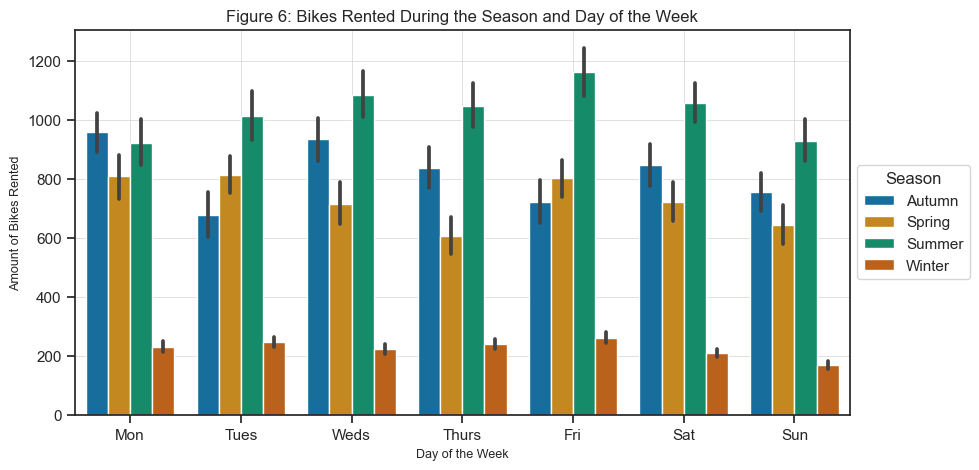

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x='Day_of_Week', y='Rented_Bike_Count', hue='Season', data=df)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.xticks(range(0,7), Weeklabels)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.xlabel('Day of the Week', fontsize=9)
plt.title('Figure 6: Bikes Rented During the Season and Day of the Week')
plt.legend(title='Season', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()
plt.close()

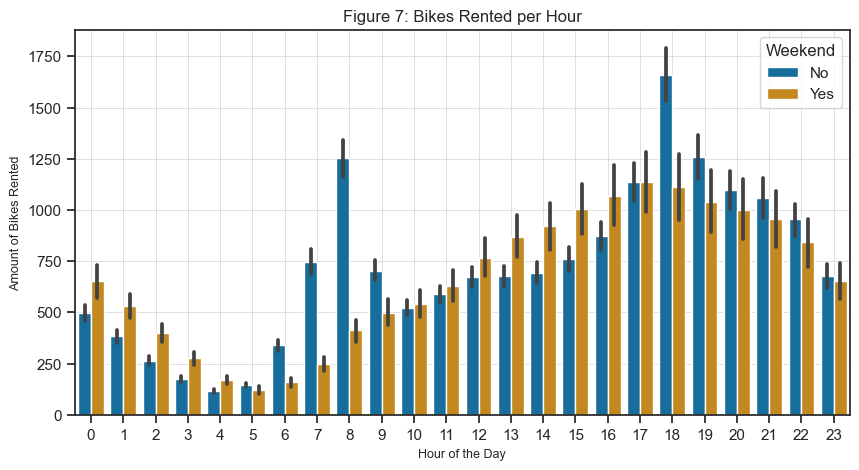

In [130]:
df_labelled = df.copy()
# Apply the mapping on the new DataFrame
df_labelled['Weekend'] = df_labelled['Weekend'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Rented_Bike_Count', hue='Weekend', data=df_labelled)
plt.grid(True, which='both', ls='-', lw=0.5, color='lightgrey')
plt.xlabel('Hour of the Day', fontsize=9)
plt.ylabel('Amount of Bikes Rented', fontsize=9)
plt.title('Figure 7: Bikes Rented per Hour')
plt.show()
plt.close()

# Summary and Conclusions
I have lived in Seoul for 12 years and understand the importance of public transportation in the city. The dataset I used (Seoul Bike Sharing Demand, 2020) comes from Ddareungi, a bike rental service and a crucial part of this system. However, the experience of not having a reliable bike nearby to commute to a location can deter people from using the service. Therefore, predicting the number of bikes needed each day while considering external factors such as weather or holidays is vital for the success of this service.

During the first phase of the project, I performed an exploratory data analysis (EDA) by exploring the dataset, cleaning and processing the data for use, and visualizing some of the dataset's features to provide insights. I looked for missing values, renamed each column to work well within Python and Pandas, and transformed the date feature by splitting it into several features of its own. This created **Year**, **Month**, **Day**, **Day of the Week**, and **Weekend**. I then reindexed the columns to make them more legible. Next, I split and assigned each feature its respective datatype. I then explored outliers for each feature and researched weather factors that may cause people to rent fewer bikes, such as **wind speeds** and **snowfall**. I also created categories for **wind speed**, **snowfall**, and **rainfall** and explored the relationship **solar radiation** would have with renting bikes. Afterwards, I looked into **functioning days** and **holidays** to see if the service counted these days. After learning that 0 bikes are rented on **functioning days**, I dropped the feature from the data frame.

I generated a few visuals to explore the cleaned data. First, I used a histogram with univariate variables to show the distribution of bikes rented per hour. This indicates that the number of bikes rented is generally under 500, and our machine-learning model predictions should reflect this. The histogram is also right-skewed, meaning I must transform the data to be more uniform. The temperature range was uniform and should not affect the model's bias. It also gives us an idea of the temperature range in South Korea and an idea of when people would be renting bikes, excluding other weather factors.

For two-variable visualizations, I looked at the relationships between the number of bikes rented by the days of the week, month, and holidays. I was surprised to see that weekends and holidays have the lowest bike rentals. This could mean people are using the rental service to commute to work or school. Looking at the months, weather does play a role in the number of renters, as colder months see fewer riders than warmer ones.

For three-variable visualizations, I looked into the relationships between the number of rented bikes by days of the week and season and also by hour and weekend. I wanted to analyze further the insights gained from the two-variable visualizations. I was surprised to find that summer was the most popular season, despite how hot it can get. South Korea is a very humid country, and I did not feel comfortable riding a bike during the summer season. I should also note that spring is when South Korea sees the most pollution, where levels can get unhealthy for outside activity. Autumn is when there is less pollution, but it is also when temperatures start to drop. Typhoon season is from August to October, which could explain the lower rentals. Each of these needs to be further explored.

By examining the bike rentals per hour and comparing them to weekdays and weekends, we can identify the most popular times people rent bikes during rush hours. This insight has practical implications for the government officials responsible for the bike rental service in Seoul. Understanding these patterns can help in optimizing the service and ensuring that the right number of bikes are available during peak hours.

# References
- Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R

- Fintelman, D. M., Sterling, M., Hemida, H., & Li, F.-X. (2014). The Effect of Crosswinds on Cyclists: An Experimental Study. Procedia Engineering, 72, 720–725. https://doi.org/10.1016/j.proeng.2014.06.122

- Heinen, E., Maat, K., & van Wee, B. (2010). The effect of work-related factors on the bicycle commute mode share in large cities. Journal of Transport Geography, 18(4), 594-603. https://doi.org/10.1016/j.jtrangeo.2009.09.002

- Avanzato, R., & Beritelli, F. (2020). An Innovative Acoustic Rain Gauge Based on Convolutional Neural Networks. Information, 11(4), 183. https://doi.org/10.3390/info11040183

- Son, Y. T., Lee, S. H., & Im, J. H. (2013). A Study on Highway Capacity Variation According to Snowfall Intensity. Journal of Korean Society of Transportation, 31(6), 3–11. https://doi.org/10.7470/jkst.2013.31.6.003

- AirKorea: Monthly Trends. (n.d.). Retrieved April 21, 2024, from https://www.airkorea.or.kr/eng/monthlyTrends?pMENU_NO=152

- Recent typhoons in South Korea. (n.d.). Worlddata.Info. Retrieved April 21, 2024, from https://www.worlddata.info/asia/south-korea/typhoons.php

